In [9]:
from modules.advanced_gans.models import *
from prep_IXI.helpers import create_dataloaders, Resize, ToTensor
import torch

In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [3]:
channels = 3
out_channels = 3

In [4]:
generator = GeneratorUNet(in_channels=channels, out_channels=out_channels, with_relu=True, with_tanh=False)

In [5]:
ckpt = torch.load("model/MMGAN/mmgan_ixi_single/generator_param_mmgan_ixi_single_60.pkl")

In [6]:
generator = nn.DataParallel(generator.cuda())
generator.load_state_dict(ckpt['state_dict'])

<All keys matched successfully>

In [10]:
n_dataloader, dataloader_for_viz = create_dataloaders(parent_path="/mnt/raid/jiang/projects/SubtleGAN/data/IXI/hdf5/",
                               parent_name='preprocessed',
                               dataset_name='validation_data',
                               dataset_type='cropped',
                               load_pat_names=True,
                               load_seg=False,
                               transform_fn=[Resize(size=(256,256)), ToTensor()],
                               apply_normalization=True,
                               which_normalization=None,
                               resize_slices=80,
                               scenarios=True,
                               num_workers=4,
                               load_indices=None,
                               dataset="BRATS2018",
                               shuffle=False)

In [11]:
test_patient = []
for k in range(0, 30):
    test_patient.append(dataloader_for_viz.getitem_via_index(k)) 

In [15]:
scenarios = [[1, 1, 0], [1, 0, 1], [0, 1, 1]]
batch_size_to_test = 1

In [13]:
patient = test_patient[0]

In [14]:
patient_image = patient['image']
patient_copy = patient['image'].clone()
patient_numpy = patient_copy.detach().cpu().numpy()

In [16]:
all_minus_1_g = torch.ones((batch_size_to_test,1,256,256)).cuda() * -1.0
all_minus_x_test_r = torch.ones((batch_size_to_test, 256, 256)).cuda() * -1.0

In [17]:
x_test_r = patient_image[20:21, ...].cuda()

In [18]:
x_test_z = x_test_r.clone().cuda().type(torch.cuda.FloatTensor)

In [19]:
impute_tensor = torch.zeros((1,
                                                 256,
                                                 256), device='cuda')

In [30]:
x_test_z[:, 0, ...] = impute_tensor
G_result = generator(x_test_z)

In [24]:
patient_numpy.shape

(90, 3, 256, 256)

In [22]:
import matplotlib.pyplot as plot

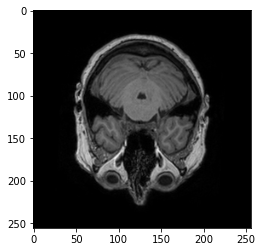

In [40]:
plot.imshow(patient_numpy[20, 0, :], cmap='gray')

In [38]:
result = G_result.detach().cpu().numpy()[0, 0, :]
patient_numpy[20, 0, :]

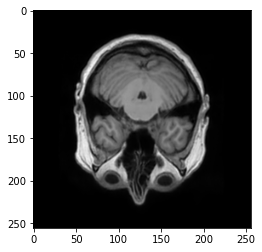

In [39]:
plot.imshow(result, cmap='gray')

In [43]:
result.max()

6.8360314

In [45]:
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [46]:
gt = patient_numpy[20, 0, :]

In [48]:
psnr(gt, result)

ValueError: im_true has intensity values outside the range expected for its data type.  Please manually specify the data_range

In [49]:
pat_name = patient['name'].decode('UTF-8')

In [50]:
pat_name

'IXI558-Guys-1079'

In [63]:
patient_image.shape

torch.Size([90, 3, 256, 256])

In [55]:
b = np.array(scenarios[0])

In [56]:
b==1

array([ True,  True, False])

In [60]:
result = G_result.detach().cpu().numpy()[0, b==0, :]

In [61]:
result.shape

(1, 256, 256)

In [64]:
np.sum(b==0)

1

In [65]:
import SimpleITK as sitk

In [70]:
a = sitk.ReadImage("../data/IXI/IXI_dataset_coregistered/IXI014-HH-1236/IXI014-HH-1236-T2.nii.gz")

In [71]:
a.GetSize()

(256, 256, 28)

In [76]:
import glob
cases = glob.glob("../data/IXI/IXI_slices/train/IXI*")

In [77]:
for case in cases:
    files = glob.glob(os.path.join(case, "*.npy"))
    print(f"{case}: {len(files)}")

../data/IXI/IXI_slices/train/IXI162-HH-1548: 90
../data/IXI/IXI_slices/train/IXI465-HH-2176: 90
../data/IXI/IXI_slices/train/IXI639-Guys-1088: 90
../data/IXI/IXI_slices/train/IXI392-Guys-1064: 90
../data/IXI/IXI_slices/train/IXI299-Guys-0893: 90
../data/IXI/IXI_slices/train/IXI459-Guys-0992: 90
../data/IXI/IXI_slices/train/IXI059-HH-1284: 90
../data/IXI/IXI_slices/train/IXI279-Guys-1044: 90
../data/IXI/IXI_slices/train/IXI298-Guys-0861: 90
../data/IXI/IXI_slices/train/IXI023-Guys-0699: 80
../data/IXI/IXI_slices/train/IXI327-HH-1999: 90
../data/IXI/IXI_slices/train/IXI310-IOP-0890: 96
../data/IXI/IXI_slices/train/IXI241-Guys-0833: 90
../data/IXI/IXI_slices/train/IXI221-HH-1606: 90
../data/IXI/IXI_slices/train/IXI372-IOP-0971: 96
../data/IXI/IXI_slices/train/IXI109-Guys-0732: 90
../data/IXI/IXI_slices/train/IXI180-HH-1605: 90
../data/IXI/IXI_slices/train/IXI237-Guys-1049: 90
../data/IXI/IXI_slices/train/IXI132-HH-1415: 90
../data/IXI/IXI_slices/train/IXI049-HH-1358: 90
../data/IXI/IXI_sl

../data/IXI/IXI_slices/train/IXI356-HH-2049: 90
../data/IXI/IXI_slices/train/IXI201-HH-1588: 90
../data/IXI/IXI_slices/train/IXI393-Guys-0941: 90
../data/IXI/IXI_slices/train/IXI251-Guys-1055: 90
../data/IXI/IXI_slices/train/IXI512-Guys-1054: 90
../data/IXI/IXI_slices/train/IXI320-Guys-0902: 90


In [27]:
import pickle
train_hist = pickle.load(open("model/MMGAN/mmgan_brats_zeros_cl_single_0110/train_hist.pkl", 'rb'))

In [28]:
val_mse = np.array(train_hist['test_loss']['mse'])
val_psnr = np.array(train_hist['test_loss']['psnr'])
val_ssim = np.array(train_hist['test_loss']['ssim'])

In [29]:
import matplotlib.pyplot as plt

58


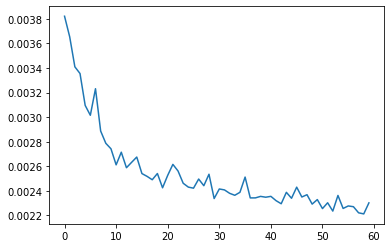

In [30]:
print(np.argmin(val_mse))
plt.plot(val_mse)

58


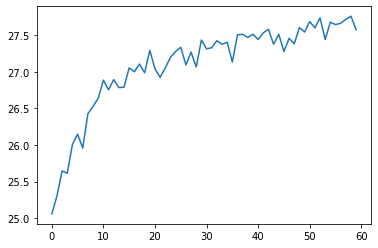

In [31]:
print(np.argmax(val_psnr))
plt.plot(val_psnr)

58


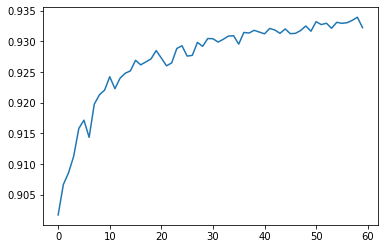

In [32]:
print(np.argmax(val_ssim))
plt.plot(val_ssim)

In [36]:
import pickle
train_hist = pickle.load(open("model/MMGAN/mmgan_ixi_random_0118/train_hist.pkl", 'rb'))

In [37]:
train_hist.keys()

dict_keys(['D_losses', 'G_losses', 'per_epoch_ptimes', 'total_ptime', 'test_loss'])

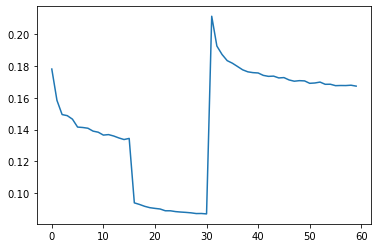

In [38]:
import matplotlib.pyplot as plt
plt.plot(train_hist['G_losses'])

In [26]:
import numpy as np
print(np.argmin(train_hist['G_losses']))
train_hist['G_losses'][58]

30


tensor(0.1679)

In [1]:
from openpyxl import Workbook
wb = Workbook()
ws = wb.create_sheet(title="test")

In [4]:
ws.cell(1,1).value = 'TEST'

In [5]:
wb.save("test.xlsx")